In [1]:
import pandas as pd

In [34]:
df = pd.read_csv('out/df_noisy_out_language_dp_rho=0.1.csv')
df.head()

,Unnamed: 0,SUMLVL,LEVEL,S203_GEOID,AIAN,ANRC,ST,CNTY,MCD,NAMELSAD,...,pred_leppct,gt_vaclep,gt_vacit,gt_illit,gt_coverage,noisy_leppct,noisy_flag5,noisy_flag10,noisy_flag_national,noisy_coverage
0,46,50,County,0500000US04013,0,0,4,13,NNNNN,Maricopa County,...,0.127001,81890.0,644800.0,10040.0,True,0.127005,True,True,True,True
1,53,50,County,0500000US04019,0,0,4,19,NNNNN,Pima County,...,0.122537,27240.0,222300.0,2491.0,False,0.122563,True,True,False,False
2,57,50,County,0500000US04023,0,0,4,23,NNNNN,Santa Cruz County,...,0.287327,6031.0,20990.0,542.0,True,0.287321,True,False,True,True
3,59,50,County,0500000US04027,0,0,4,27,NNNNN,Yuma County,...,0.230711,15310.0,66360.0,1996.0,True,0.230748,True,True,True,True
4,61,50,County,0500000US06001,0,0,6,1,NNNNN,Alameda County,...,0.160273,29330.0,183000.0,3479.0,True,0.160201,True,True,True,True


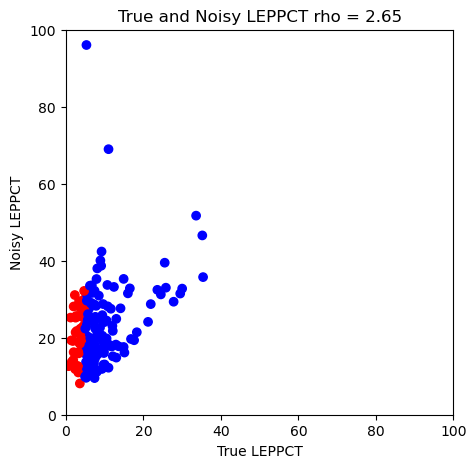

In [35]:
# plot true and noisy LEPPCT
import matplotlib.pyplot as plt
import numpy as np

# convert noisy_leppct into a percentage
df['noisy_leppct_perc'] = df['noisy_leppct'] * 100

plt.figure(figsize=(5, 5))

# scatter df['LEPPCT'] vs df['noisy_leppct_perc'] and color each point
# if df['LEPPCT'] > 0.05 and df['noisy_leppct_perc'] > 0.05, color it black
# if df['LEPPCT'] > 0.05 and df['noisy_leppct_perc'] < 0.05, color it red, label it 'false negative'
# if df['LEPPCT'] < 0.05 and df['noisy_leppct_perc'] > 0.05, color it blue, label it 'false positive'
# if df['LEPPCT'] < 0.05 and df['noisy_leppct_perc'] < 0.05, color it green, label it 'true negative'


# combine the two above into one for loop
colors = []
labels = []

for i in range(df['LEPPCT'].size):
    if df['LEPPCT'][i] >= 5 and df['noisy_leppct_perc'][i] >= 5:
        colors.append('b')
        labels.append('true positive')
    elif df['LEPPCT'][i] > 5 and df['noisy_leppct_perc'][i] < 5:
        colors.append('r')
        labels.append('false negative')
    elif df['LEPPCT'][i] < 5 and df['noisy_leppct_perc'][i] > 5:
        colors.append('r')
        labels.append('false positive')
    elif df['LEPPCT'][i] < 5 and df['noisy_leppct_perc'][i] < 5:
        colors.append('o')
        labels.append('true negative')

# plot the scatter plot
plt.scatter(df['LEPPCT'], df['noisy_leppct_perc'], c=colors, label=labels)

# make limits on both axis (0, 100)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('True and Noisy LEPPCT rho = 2.65')
plt.xlabel('True LEPPCT')
plt.ylabel('Noisy LEPPCT')

# show legend for unique labels
# plt.legend(

plt.show()


In [19]:
df['LEPPCT'] < 5

0       True
1       True
2      False
3      False
4       True
       ...  
189    False
190    False
191    False
192     True
193    False
Name: LEPPCT, Length: 194, dtype: bool